In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/DA_kpi/cleand.csv',)

df.drop('Unnamed: 0', inplace=True, axis=1)
df

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Year_Customer,Total_kids,Spending
0,Bachelor,Single,58138.0,58,3,8,10,4,7,64,9,0,1617
1,Bachelor,Single,46344.0,38,2,1,1,2,5,67,7,2,27
2,Bachelor,Relationship,71613.0,26,1,8,2,10,4,56,8,0,776
3,Bachelor,Relationship,26646.0,26,2,2,0,4,6,37,7,1,53
4,PhD,Relationship,58293.0,94,5,5,3,6,5,40,7,1,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,Bachelor,Relationship,34421.0,81,1,1,0,2,7,47,8,1,30
2151,Bachelor,Relationship,61223.0,46,2,9,3,4,5,54,8,1,1341
2152,Bachelor,Single,56981.0,91,1,2,3,13,6,40,7,0,1241
2153,Master,Relationship,69245.0,8,2,6,5,10,3,65,7,1,843


In [2]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Age', 'Year_Customer', 'Total_kids', 'Spending'],
      dtype='object')

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[['Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Age', 'Year_Customer', 'Total_kids', 'Spending']])
scaled = scaler.fit_transform(df[['Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Age', 'Year_Customer', 'Total_kids', 'Spending']])
scaled_df = pd.DataFrame(scaled, columns=['Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Age', 'Year_Customer', 'Total_kids', 'Spending'])

In [4]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
for i in ['Education', 'Marital_Status']:
    df[i]=df[[i]].apply(encode.fit_transform)

In [5]:
final_df = pd.concat([df[['Education', 'Marital_Status']], scaled_df], axis=1)

In [6]:
final_df

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Year_Customer,Total_kids,Spending
0,0,1,0.351086,0.585859,0.200000,0.296296,0.357143,0.307692,0.35,0.696429,1.0,0.0,0.649738
1,0,1,0.277680,0.383838,0.133333,0.037037,0.035714,0.153846,0.25,0.750000,0.0,1.0,0.008867
2,0,0,0.434956,0.262626,0.066667,0.296296,0.071429,0.769231,0.20,0.553571,0.5,0.0,0.310762
3,0,0,0.155079,0.262626,0.133333,0.074074,0.000000,0.307692,0.30,0.214286,0.0,0.5,0.019347
4,3,0,0.352051,0.949495,0.333333,0.185185,0.107143,0.461538,0.25,0.267857,0.0,0.5,0.168077
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,0,0,0.203471,0.818182,0.066667,0.037037,0.000000,0.153846,0.35,0.392857,0.5,0.5,0.010077
2151,0,0,0.370288,0.464646,0.133333,0.333333,0.107143,0.307692,0.25,0.517857,0.5,0.5,0.538493
2152,0,1,0.343885,0.919192,0.066667,0.074074,0.107143,1.000000,0.30,0.267857,0.0,0.0,0.498186
2153,2,0,0.420217,0.080808,0.133333,0.222222,0.178571,0.769231,0.15,0.714286,0.0,0.5,0.337767


In [7]:
from keras.utils import to_categorical

X = final_df.drop(['Total_kids'], axis = 1)
y = final_df['Total_kids']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80)

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [8]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential(name="FFNN")

model.add(Dense(20, input_shape=(12,), activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(2,  activation = 'relu'))

model.compile(loss="binary_crossentropy", metrics = ['accuracy'], optimizer = 'adam')
results = model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
54/54 [==============================] - 14s 4ms/step - loss: 0.9361 - accuracy: 0.7836
Epoch 2/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5048 - accuracy: 0.8074
Epoch 3/100
54/54 [==============================] - 0s 4ms/step - loss: 0.4748 - accuracy: 0.8080
Epoch 4/100
54/54 [==============================] - 0s 4ms/step - loss: 0.4610 - accuracy: 0.8086
Epoch 5/100
54/54 [==============================] - 0s 4ms/step - loss: 0.4476 - accuracy: 0.8080
Epoch 6/100
54/54 [==============================] - 0s 4ms/step - loss: 0.4845 - accuracy: 0.8173
Epoch 7/100
54/54 [==============================] - 0s 4ms/step - loss: 0.4361 - accuracy: 0.8086
Epoch 8/100
54/54 [==============================] - 0s 4ms/step - loss: 0.4305 - accuracy: 0.8086
Epoch 9/100
54/54 [==============================] - 0s 4ms/step - loss: 0.4246 - accuracy: 0.8097
Epoch 10/100
54/54 [==============================] - 0s 4ms/step - loss: 0.4225 - accuracy: 0.8161
Epoch 11

In [9]:
acc = model.evaluate(X_test, y_test, verbose=0)
print('Losses:', acc[0])
print('Accuracy:', acc[1])

Losses: 0.38653868436813354
Accuracy: 0.839907169342041


https://www.kaggle.com/datasets/andrewmvd/animal-faces/data

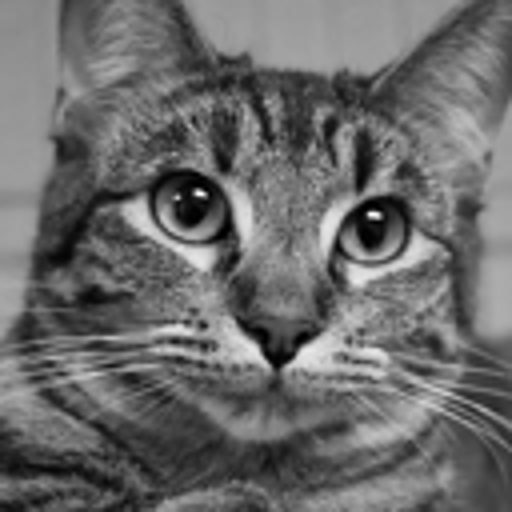

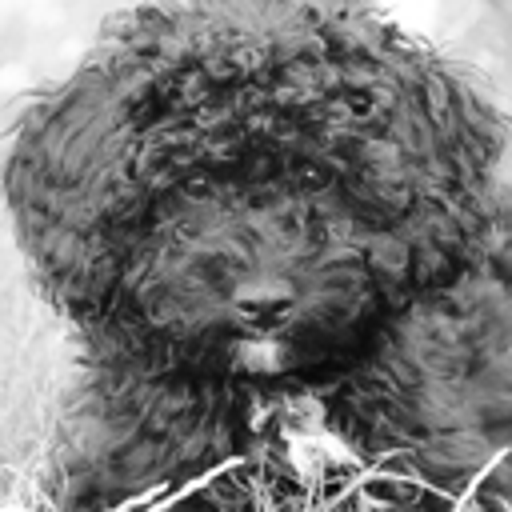

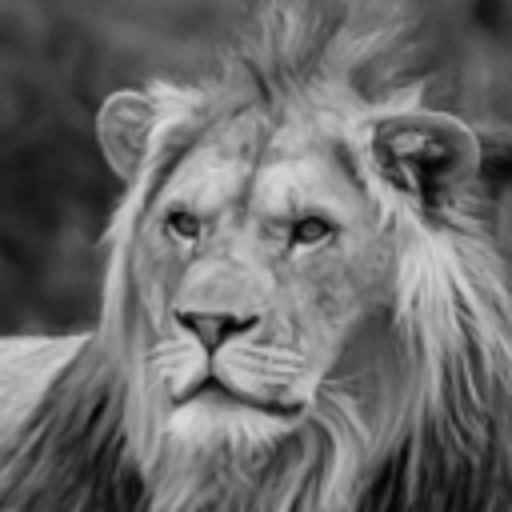

In [10]:
import os
from PIL import Image, ImageOps
import random

cat_dir = '/content/drive/MyDrive/DA_kpi/afhq/train/cat'
dog_dir = '/content/drive/MyDrive/DA_kpi/afhq/train/dog'
wild_dir = '/content/drive/MyDrive/DA_kpi/afhq/train/wild'

cat_images = [os.path.join(cat_dir, cat) for cat in os.listdir(cat_dir)[:3000]      if cat.endswith(".jpg")]
dog_images = [os.path.join(dog_dir, dog) for dog in os.listdir(dog_dir)[:3000]      if dog.endswith(".jpg")]
wild_images = [os.path.join(wild_dir, wild) for wild in os.listdir(wild_dir)[:3000] if wild.endswith(".jpg")]

cats = [ImageOps.grayscale(Image.open(cat).resize((128, 128)))  for cat in cat_images]
dogs = [ImageOps.grayscale(Image.open(dog).resize((128, 128)))  for dog in dog_images]
wild = [ImageOps.grayscale(Image.open(wild).resize((128, 128))) for wild in wild_images]

display(cats[random.randint(0, len(cats))].resize((512, 512)))
display(dogs[random.randint(0, len(dogs))].resize((512, 512)))
display(wild[random.randint(0, len(wild))].resize((512, 512)))

In [11]:
import numpy as np

catArray = [[np.asarray(image)/ 255.0, [1, 0, 0]] for image in cats]
dogArray = [[np.asarray(image)/ 255.0, [0, 1, 0]] for image in dogs]
wildArray = [[np.asarray(image)/ 255.0,[0, 0, 1]] for image in wild]

fullArray = [*catArray, *dogArray, *wildArray]
random.shuffle(fullArray)

X = np.array([imagem for imagem, classe in fullArray])
Y = np.array([classe for imagem, classe in fullArray])

Y = Y.reshape(-1, 3)

print(X[0])
print(Y[0])

[[0.99607843 0.99607843 0.99607843 ... 0.4627451  0.45882353 0.45098039]
 [0.99607843 0.99607843 0.99607843 ... 0.54509804 0.52941176 0.53333333]
 [0.99607843 0.99607843 0.99607843 ... 0.58431373 0.57254902 0.57254902]
 ...
 [0.56078431 0.50980392 0.49019608 ... 0.74901961 0.75686275 0.76470588]
 [0.4627451  0.45098039 0.51764706 ... 0.72156863 0.70196078 0.70588235]
 [0.48235294 0.48627451 0.4745098  ... 0.74509804 0.6627451  0.62352941]]
[0 1 0]


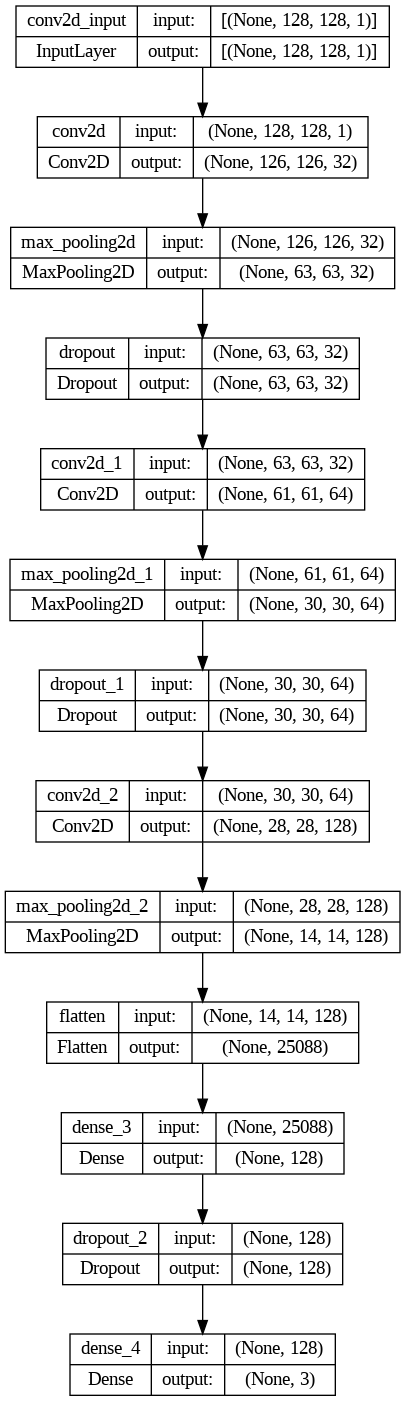

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

In [12]:
from keras import layers, models
from keras.models import *
from keras.layers import *
from keras.optimizers import RMSprop
from tensorflow.keras.utils import plot_model


def CNN():
    model = models.Sequential()


    model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(128,128,1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))


    model.add(Conv2D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))


    model.add(Conv2D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))

    model.add(Dense(3, activation='sigmoid'))

    display(plot_model(model, show_shapes=True, show_layer_names=True))
    model.summary()
    return model

model_cnn = CNN()

model_cnn.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

In [14]:
model_cnn.fit(X_train, y_train, batch_size=50, epochs=5)

Epoch 1/5
144/144 [==============================] - 14s 36ms/step - loss: 0.4243 - accuracy: 0.6867
Epoch 2/5
144/144 [==============================] - 5s 34ms/step - loss: 0.1900 - accuracy: 0.8896
Epoch 3/5
144/144 [==============================] - 5s 34ms/step - loss: 0.1184 - accuracy: 0.9308
Epoch 4/5
144/144 [==============================] - 5s 36ms/step - loss: 0.0797 - accuracy: 0.9543
Epoch 5/5
144/144 [==============================] - 5s 34ms/step - loss: 0.0628 - accuracy: 0.9664


In [15]:
results = model_cnn.evaluate(X_test, y_test)
print('Losses:', results[0])
print('Accuracy:', results[1])

57/57 [==============================] - 1s 8ms/step - loss: 0.0825 - accuracy: 0.9528
Losses: 0.0825120359659195
Accuracy: 0.9527778029441833


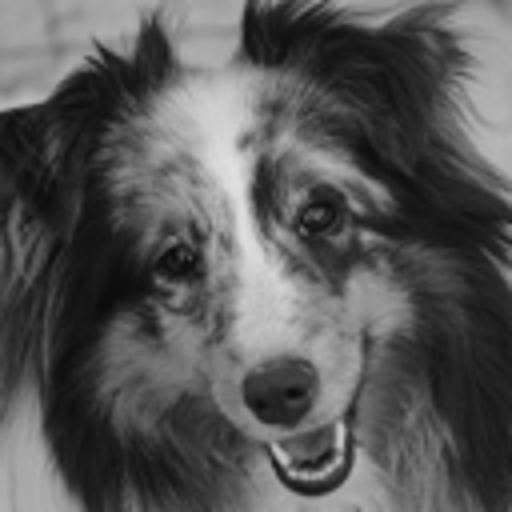

^ Predicted class ->	Dog
Expected class:	Dog

	>> 0.00% Cat // 99.95% Dog // 0.05% Wild





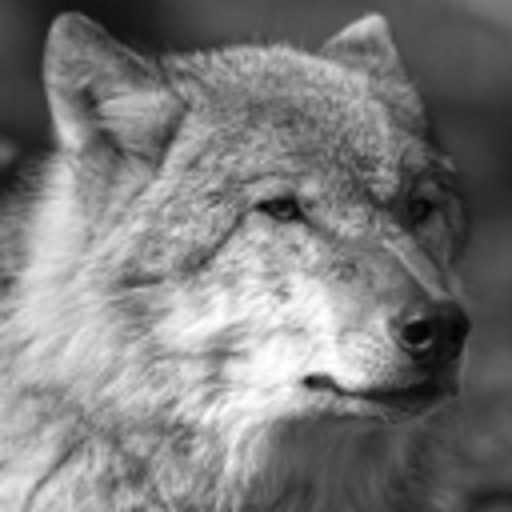

^ Predicted class ->	Wild
Expected class:	Wild

	>> 2.84% Cat // 0.25% Dog // 94.84% Wild





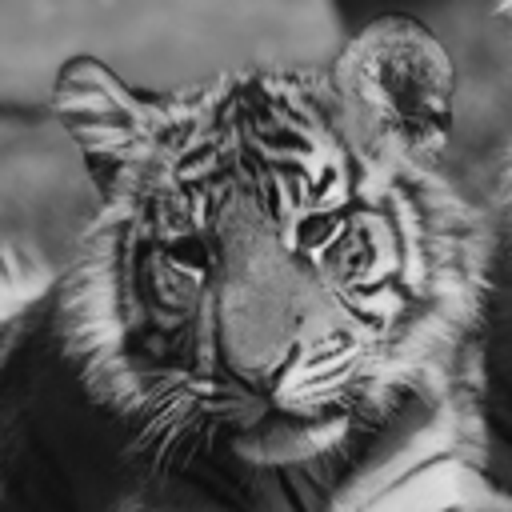

^ Predicted class ->	Wild
Expected class:	Wild

	>> 0.15% Cat // 0.00% Dog // 99.91% Wild





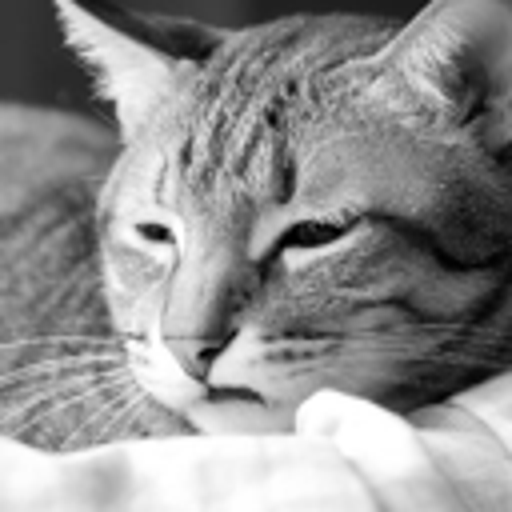

^ Predicted class ->	Cat
Expected class:	Cat

	>> 92.13% Cat // 0.00% Dog // 10.12% Wild





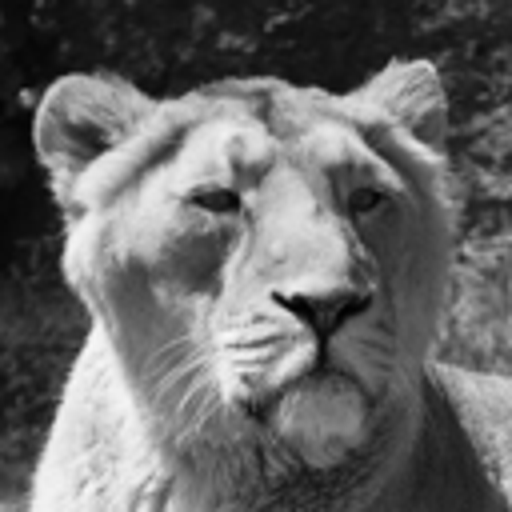

^ Predicted class ->	Wild
Expected class:	Wild

	>> 0.13% Cat // 0.03% Dog // 99.58% Wild





In [16]:
for i in range(5):
    idx = np.random.randint(0, len(X_test))
    img = X_test[idx]
    predict =  model_cnn.predict(np.array([img]), verbose=0)[0]
    pred_class = (predict/max(predict)).astype(int)

    ani_class = 'Cat' if y_test[idx][0] else 'Dog' if y_test[idx][1] else 'Wild'
    pred_class = 'Cat' if pred_class[0] else 'Dog' if pred_class[1] else 'Wild'

    array = (img * 255).astype(np.uint8).reshape((128, 128))
    display(Image.fromarray(array).resize((512, 512)))

    print(f'^ Predicted class ->\t{pred_class}\nExpected class:\t{ani_class}\n\n\t>> {100*predict[0]:.2f}% Cat // {100*predict[1]:.2f}% Dog // {100*predict[2]:.2f}% Wild\n\n\n')

In [35]:
text_df = pd.read_csv('/content/drive/MyDrive/DA_kpi/text_cleand.csv')

In [36]:
text_df = text_df[['text', 'label']]

In [37]:
X=text_df['text']
y=text_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53)

In [38]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=1000, split=" ")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [39]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=100)
X_test_seq_trunc = pad_sequences(X_test_seq, maxlen=100)

In [40]:
print(X_train_seq[0])
print(X_train_seq_trunc[0])

[412, 122, 207, 449, 319, 614, 21, 36, 227, 50, 2, 102, 2, 1, 261, 364, 8, 136, 121, 38, 114, 1, 14, 54, 4, 50, 2, 11, 459, 4, 386, 348, 128, 208, 8, 22, 412, 122, 207, 617, 689, 77, 337, 36, 410, 2, 107, 660, 2, 343, 364, 578, 238, 127, 319, 801, 894, 432, 293, 1, 162, 551, 193, 261, 77, 70, 180, 346, 122, 630, 5, 77, 70, 180, 671, 410, 9, 610, 350, 492, 185, 149, 162, 25, 523, 201, 370, 160, 249, 459, 114, 34, 32, 875, 900, 579, 107, 432, 187, 352, 124, 352, 669, 523, 122, 24, 379, 410, 2, 801, 111, 373, 44, 343, 22, 450, 68, 187, 102, 227, 177, 379, 790, 145, 78, 328, 561, 44, 8, 136, 121, 410, 395, 121, 93, 266, 578, 2]
[207 617 689  77 337  36 410   2 107 660   2 343 364 578 238 127 319 801
 894 432 293   1 162 551 193 261  77  70 180 346 122 630   5  77  70 180
 671 410   9 610 350 492 185 149 162  25 523 201 370 160 249 459 114  34
  32 875 900 579 107 432 187 352 124 352 669 523 122  24 379 410   2 801
 111 373  44 343  22 450  68 187 102 227 177 379 790 145  78 328 561  44
   

In [41]:
print(X_train_seq[10])
print(X_train_seq_trunc[10])

[33, 13, 2, 13]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 33 13  2 13]


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 8)            964096    
                                                                 
 gru (GRU)                   (None, 64)                14208     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 978369 (3.73 MB)
Trainable params: 978369 (3.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


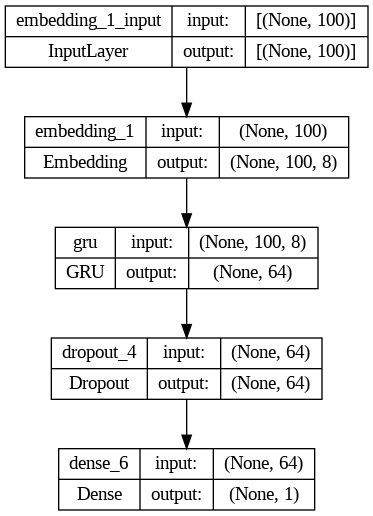

In [43]:
model_rnn = models.Sequential()
model_rnn.add(layers.Embedding(len(tokenizer.index_word), 8, input_length=100))
model_rnn.add(tf.keras.layers.GRU(64))
model_rnn.add(layers.Dropout(0.2))
model_rnn.add(layers.Dense(1, activation='sigmoid'))

model_rnn.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model_rnn.summary()

display(plot_model(model_rnn, show_shapes=True, show_layer_names=True))

In [44]:
model_rnn.fit(x=X_train_seq_trunc,y=y_train,batch_size=30,epochs=10)

Epoch 1/10
169/169 [==============================] - 22s 101ms/step - loss: 0.5957 - accuracy: 0.6584
Epoch 2/10
169/169 [==============================] - 6s 35ms/step - loss: 0.3234 - accuracy: 0.8652
Epoch 3/10
169/169 [==============================] - 4s 22ms/step - loss: 0.2519 - accuracy: 0.9004
Epoch 4/10
169/169 [==============================] - 4s 23ms/step - loss: 0.2238 - accuracy: 0.9120
Epoch 5/10
169/169 [==============================] - 4s 23ms/step - loss: 0.1898 - accuracy: 0.9290
Epoch 6/10
169/169 [==============================] - 2s 11ms/step - loss: 0.1584 - accuracy: 0.9465
Epoch 7/10
169/169 [==============================] - 2s 12ms/step - loss: 0.1420 - accuracy: 0.9522
Epoch 8/10
169/169 [==============================] - 2s 13ms/step - loss: 0.1134 - accuracy: 0.9645
Epoch 9/10
169/169 [==============================] - 2s 10ms/step - loss: 0.0993 - accuracy: 0.9694
Epoch 10/10
169/169 [==============================] - 2s 11ms/step - loss: 0.0883 - accu

In [49]:
acc = model_rnn.evaluate(X_test_seq_trunc, y_test, verbose=0)
print('Losses:', acc[0])
print('Accuracy:', acc[1])

Losses: 0.39636361598968506
Accuracy: 0.8784530162811279
